<a href="https://colab.research.google.com/github/J-wq/Physics-Informed-ML/blob/main/Autoencoder_04_09_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf

from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
## Load data to numpy array
x_train = 

x_val = 

x_test = 

In [21]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, _), (x_val, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_val = np.reshape(x_val, (len(x_val), 28, 28, 1))

4431872/4422102 [==============================] - 0s 0us/step


In [27]:
# Set training parameters
input_size = (28, 28, 1)
learning_rate = 10**(-4)
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
epochs = 3
batch_size = 512

# Create the Encoder and Decoder
inputs = tf.keras.Input(shape=input_size, name='input_layer')
augmented = tf.keras.layers.RandomFlip("horizontal_and_vertical")(inputs)
augmented = tf.keras.layers.RandomRotation(0.1)(augmented)

# Conv Block 1 -> BatchNorm->leaky Relu
encoded = tf.keras.layers.Conv2D(32, kernel_size=3, strides= 1, padding='same', name='conv_1')(augmented)
encoded = tf.keras.layers.BatchNormalization(name='batchnorm_1')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='leaky_relu_1')(encoded)

# Conv Block 2 -> BatchNorm->leaky Relu
encoded = tf.keras.layers.Conv2D(64, kernel_size=3, strides= 2, padding='same', name='conv_2')(encoded)
encoded = tf.keras.layers.BatchNormalization(name='batchnorm_2')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='leaky_relu_2')(encoded)

# Conv Block 3 -> BatchNorm->leaky Relu
encoded = tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', name='conv_3')(encoded)
encoded = tf.keras.layers.BatchNormalization(name='batchnorm_3')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='leaky_relu_3')(encoded)


#Decoder
# DeConv Block 1-> BatchNorm->leaky Relu
decoded = tf.keras.layers.Conv2DTranspose(64, 3, strides= 1, padding='same',name='conv_transpose_1')(encoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_4')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='leaky_relu_4')(decoded)
# DeConv Block 2-> BatchNorm->leaky Relu
decoded = tf.keras.layers.Conv2DTranspose(64, 3, strides= 2, padding='same', name='conv_transpose_2')(decoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_5')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='leaky_relu_5')(decoded)
# DeConv Block 3-> BatchNorm->leaky Relu
decoded = tf.keras.layers.Conv2DTranspose(32, 3, 2, padding='same', name='conv_transpose_3')(decoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_6')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='leaky_relu_6')(decoded)
# output
outputs = tf.keras.layers.Conv2DTranspose(1, 3, 1,padding='same', activation='sigmoid', name='conv_transpose_4')(decoded)

In [28]:
def SSIMLoss(y_true, y_pred):
  return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred,1.0))

In [29]:
autoencoder = tf.keras.Model(inputs, outputs)
autoencoder.compile(optimizer=optimizer, loss=SSIMLoss)

In [30]:
history = autoencoder.fit(x_train, x_train,
                          epochs=epochs, 
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(x_val, x_val)
                          )

Epoch 1/3
118/118 [==============================] - 284s 2s/step - loss: 0.7816 - val_loss: 0.8698
Epoch 2/3
118/118 [==============================] - 281s 2s/step - loss: 0.6885 - val_loss: 0.7850
Epoch 3/3
118/118 [==============================] - 280s 2s/step - loss: 0.6483 - val_loss: 0.6512


In [31]:
decoded_imgs = autoencoder.predict(x_val)

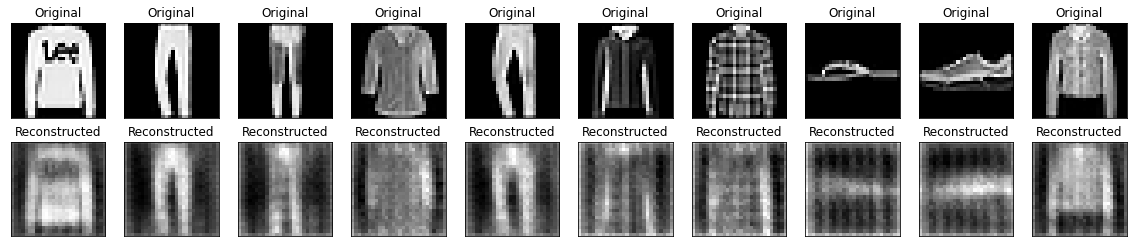

In [33]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_val[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    plt.title("Original")
    ax.get_yaxis().set_visible(False)    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.title("Reconstructed")
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()